In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
store = pd.read_csv("all_data/Vrinda Store Data Analysis - Vrinda Store.csv")
store.head()

,index,Order ID,Cust ID,M,Age,age group,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,Adult,12/4/2022,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,Teenager,12/4/2022,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,Senior,12/4/2022,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,Teenager,12/4/2022,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,Senior,12/4/2022,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [3]:
# replacing all the unmatched character by women and men 

Sex= store["M"].replace({'M':"Men","W":"Women"})

In [4]:
# adding a column by name sex
store.insert(3,"Sex",value=Sex)

In [5]:
# drop column named M 
store.drop(columns=["M"],inplace=True)

In [6]:
# removing data errors from col qty 
store["Qty"]=store["Qty"].replace({"One":1,"Two":2})


In [7]:
# changing col qty  to intiger 
store["Qty"]=pd.to_numeric(store["Qty"],errors="coerce")

In [8]:
# changing col date rom object to date 
store["Date"]=pd.to_datetime(store["Date"],errors="coerce")

In [9]:
# replacing typo errors with same manner 
store["ship-state"]=store["ship-state"].replace({"Arunachal pradesh":"ARUNACHAL PRADESH","Arunachal pradesh":"ARUNACHAL PRADESH","chandigarh":"CHANDIGARH","Goa":"GOA","goa":"GOA","New Delhi":"DELHI","manipur":"MANIPUR","nagaland":"NAGALAND","sikkim":"SIKKIM",},inplace=True)

C:\Users\nauti\AppData\Local\Temp\ipykernel_53236\1200461415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store["ship-state"]=store["ship-state"].replace({"Arunachal pradesh":"ARUNACHAL PRADESH","Arunachal pradesh":"ARUNACHAL PRADESH","chandigarh":"CHANDIGARH","Goa":"GOA","goa":"GOA","New Delhi":"DELHI","manipur":"MANIPUR","nagaland":"NAGALAND","sikkim":"SIKKIM",},inplace=True)


In [24]:
# coverting it back to string 
store["ship-state"]=store["ship-state"].astype("str")

In [10]:
# since this data is from india so column like currency and country shoulb be removed \
store=store.drop(columns=["currency","ship-country"]) 

In [25]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             31047 non-null  int64         
 1   Order ID          31047 non-null  object        
 2   Cust ID           31047 non-null  int64         
 3   Sex               31047 non-null  object        
 4   Age               31047 non-null  int64         
 5   age group         31047 non-null  object        
 6   Date              31047 non-null  datetime64[ns]
 7   Status            31047 non-null  object        
 8   Channel           31047 non-null  object        
 9   SKU               31047 non-null  object        
 10  Category          31047 non-null  object        
 11  Size              31047 non-null  object        
 12  Qty               31047 non-null  int64         
 13  Amount            31047 non-null  int64         
 14  ship-city         3104

In [12]:
store.describe()

,index,Cust ID,Age,Date,Qty,Amount,ship-postal-code
count,31047.00000,3.104700e+04,31047.000000,31047,31047.000000,31047.000000,31047.000000
mean,15524.00000,4.936824e+06,39.496570,2022-06-15 06:41:39.719779584,1.006120,682.074822,460474.587206
min,1.00000,8.950000e+02,18.000000,2022-01-04 00:00:00,1.000000,229.000000,110001.000000
25%,7762.50000,2.416471e+06,28.000000,2022-03-06 00:00:00,1.000000,486.000000,313001.000000
50%,15524.00000,4.909885e+06,37.000000,2022-06-06 00:00:00,1.000000,646.000000,500028.000000
75%,23285.50000,7.454182e+06,47.000000,2022-09-06 00:00:00,1.000000,794.000000,600040.000000
max,31047.00000,9.999233e+06,78.000000,2022-12-06 00:00:00,5.000000,3036.000000,855117.000000
std,8962.64124,2.900678e+06,15.117233,NaN,0.094088,268.582173,198116.733009


In [13]:
# export cleaned data  
store.to_csv("C:\\Users\\nauti\\Desktop\\python_ducat\\cleaned\\cleaned.csv")

<BarContainer object of 5 artists>

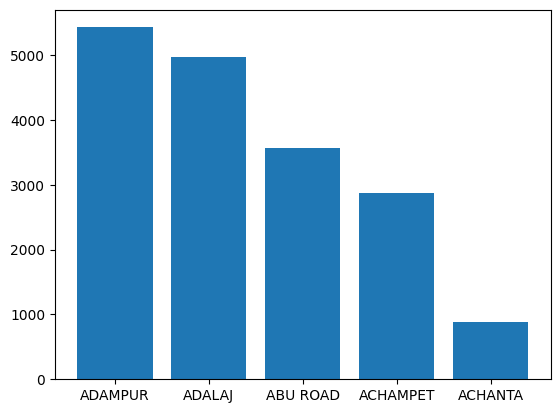

In [14]:
# top 5 cities contributed in most sales 
# GRAPGH REPRESENTATION 

total=store.groupby("ship-city")["Amount"].sum().head().sort_values(ascending=False)
city= total.reset_index()

plt.bar(city["ship-city"], city["Amount"])

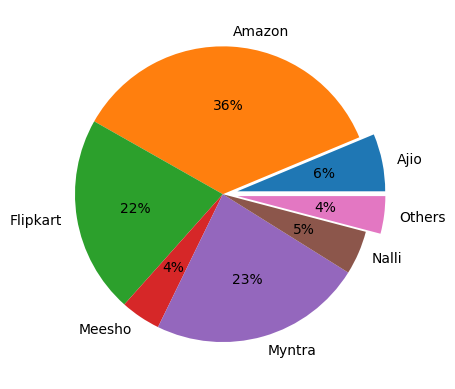

In [15]:
# plotting a pie chart based on   most sales  by channel

piechart= store.groupby("Channel ")["Amount"].sum()
label= piechart.index
plt.pie(piechart,labels=label,autopct="%1.f%%",explode=[0.1,0,0,0,0,0,0.1])




plt.show()


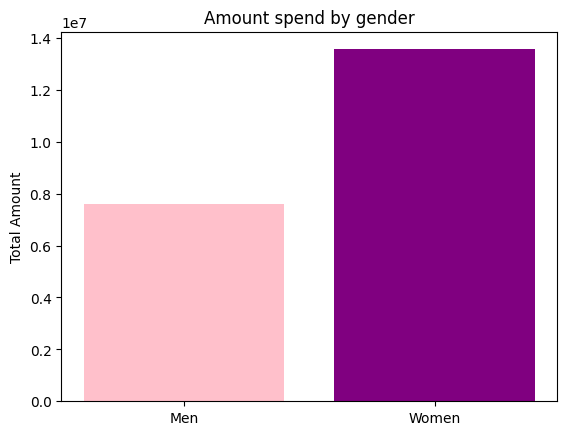

In [16]:
# Amount spend by eacg gender 

amount= store.groupby("Sex")["Amount"].sum()

gender = amount.index


plt.bar(gender,amount,color=["pink","purple"])



plt.ylabel("Total Amount")

plt.title("Amount spend by gender")


plt.show()


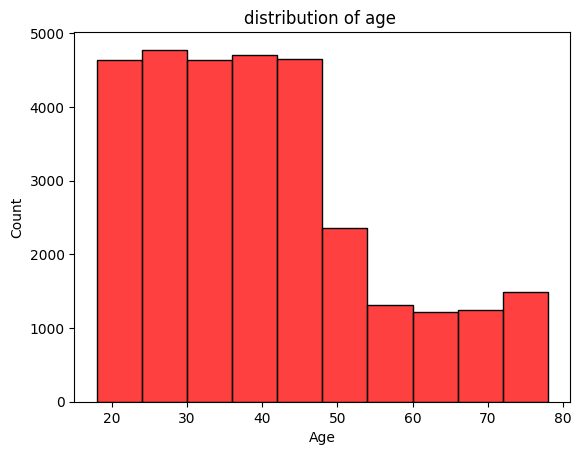

In [17]:

# AGe Distribution of data 

import seaborn as sns 
sns.histplot(x=store["Age"],bins=10,color="red")
plt.title("distribution of age ")
plt.show()

In [18]:
store.head(1)

,index,Order ID,Cust ID,Sex,Age,age group,Date,Status,Channel,SKU,Category,Size,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,1,171-1029312-3038738,1029312,Women,44,Adult,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,376,MOHALI,None,140301,False


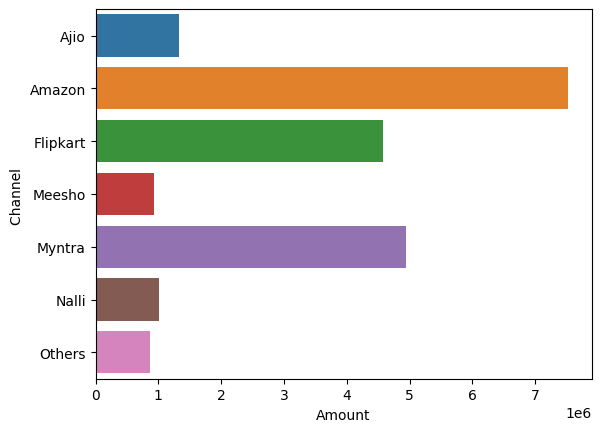

In [19]:
# barchart on each channel 
piechart= store.groupby("Channel ")["Amount"].sum()
label= piechart.index

sns.barplot(x=piechart,y=label,hue=label)

plt.show()

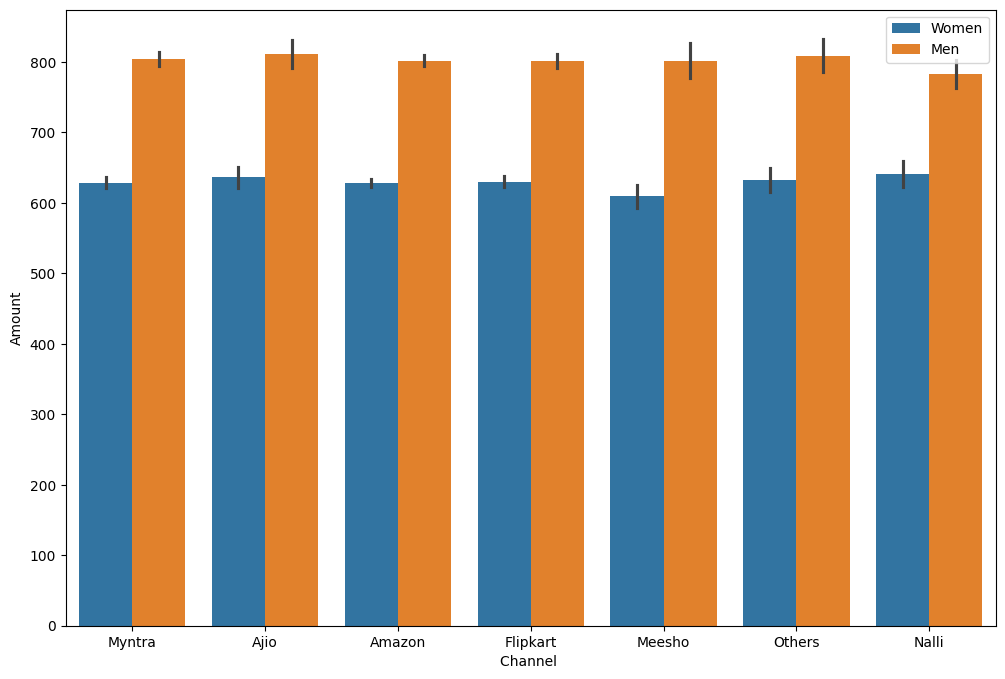

In [20]:

# sales by gender by each channel 

a = store.groupby(["Channel ","Sex"])["Amount"].sum().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=store["Channel "],y=store["Amount"],data=a,hue=store["Sex"])
plt.legend()